In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book

<function fastbook.setup_book>

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'xxx')

In [4]:
guitar_types = 'fender stratocaster','fender telecaster','gibson sg', 'gibson les paul', 'flying v'
path = Path('guitars')

In [5]:
if not path.exists():
    path.mkdir()
    for o in guitar_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} electric guitar')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [6]:
fns = get_image_files(path)
fns

(#633) [Path('guitars/gibson sg/00000068.jpg'),Path('guitars/gibson sg/00000073.jpg'),Path('guitars/gibson sg/00000110.jpg'),Path('guitars/gibson sg/00000004.jpg'),Path('guitars/gibson sg/00000028.jpg'),Path('guitars/gibson sg/00000021.jpg'),Path('guitars/gibson sg/00000107.jpg'),Path('guitars/gibson sg/00000120.jpg'),Path('guitars/gibson sg/00000058.jpg'),Path('guitars/gibson sg/00000047.jpg')...]

In [7]:
failed = verify_images(fns)
failed

(#0) []

In [8]:
failed.map(Path.unlink)

(#0) []

In [9]:
guitars = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [10]:
dls = guitars.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


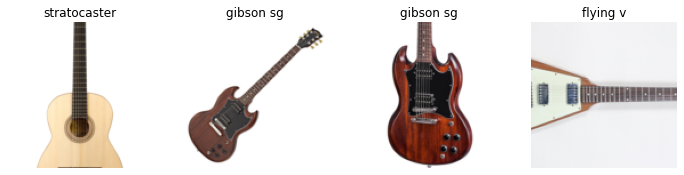

In [11]:
dls.valid.show_batch(max_n = 4, nrows = 1)

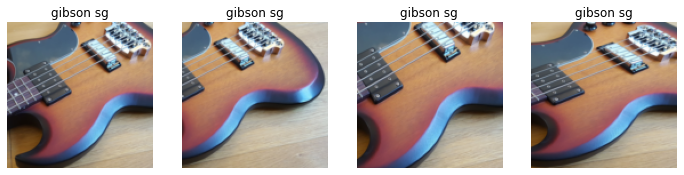

In [13]:
guitars = guitars.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1, unique = True)

In [14]:
guitars = guitars.new(
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms()
)

dls = guitars.dataloaders(path)

In [15]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.349789,1.119108,0.365079,00:22


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.288721,0.723549,0.253968,00:22
1,1.107562,0.625327,0.158730,00:22
2,0.915129,0.625420,0.166667,00:22
3,0.793495,0.589082,0.174603,00:22


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


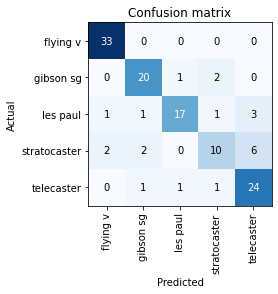

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

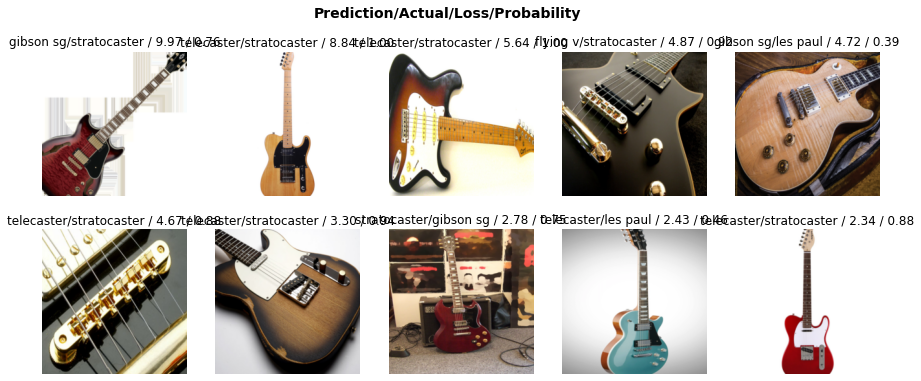

In [17]:
interp.plot_top_losses(10, nrows = 2)

In [18]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [19]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change():shutil.move(str(cleaner.fns[idx]), path/cat)

In [21]:
learn.export()

In [22]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [27]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [31]:
btn_upload = SimpleNamespace(data = ['guitars/gibson sg/00000001.jpg'])

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [34]:
pred, pred_idx, probs = learn_inf.predict(img)

In [36]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: gibson sg; Probability: 0.9971')

In [37]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [38]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [39]:
btn_upload = widgets.FileUpload()

In [41]:
VBox([widgets.Label('What electric guitar is this?'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [43]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.9MB 8.3MB/s 
     |████████████████████████████████| 112kB 38.0MB/s 
     |████████████████████████████████| 552kB 29.8MB/s 
     |████████████████████████████████| 225kB 45.5MB/s 
ERROR: nbdev 1.1.5 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
